In [1]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.ArHLv26nu3/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.7XcHXQi8wF/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.UajgXMszkR/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [2]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium
!pip3 install fake_useragent
!pip3 install faker
!unzip -o letters.zip
!unzip -o pics.zip

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://deb.debian.org/debian-security buster/updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 222 kB in 2s (95.5 

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from fake_useragent import UserAgent
import time

options = Options()

ua = UserAgent()
userAgent = ua.random

print(userAgent)

options.add_argument(f'user-agent={userAgent}')
options.add_argument("--headless")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome("chromedriver", options=options)
url = 'http://siliconexam.com/st-register.php'
driver.get(url)
time.sleep(1)
driver.get_screenshot_as_file('0driver.png')

Mozilla/5.0 (X11;  Ubuntu; Linux i686; rv:52.0) Gecko/20100101 Firefox/52.0


True

In [8]:
from selenium.webdriver.support.ui import Select
import random

country_id = Select(driver.find_element("name", 'country_id'))
country_id.select_by_value(str(random.randint(1,233)))
driver.get_screenshot_as_file('1country.png')

True

In [9]:
from faker import Factory

faker = Factory.create('en')
fname = faker.first_name()
lname = faker.last_name()
print(fname, lname)

Glenda Martin


In [10]:
fakertw = Factory.create("zh_TW")
fname = fakertw.first_name()
lname = fakertw.last_name()
print(fname, lname)

雅惠 沈


In [11]:
fcname = driver.find_element("name", "fcname")
fcname.clear()
fcname.send_keys(lname)

lcname = driver.find_element("name", "lcname")
lcname.clear()
lcname.send_keys(fname)

driver.get_screenshot_as_file('2cname.png')

True

In [12]:
faker = Factory.create("en")

fename = driver.find_element("name", "fename")
fename.clear()
fename.send_keys(faker.first_name())

lename = driver.find_element("name", "lename")
lename.clear()
lename.send_keys(faker.last_name())
driver.get_screenshot_as_file('3ename.png')

True

In [13]:
useryy = Select(driver.find_element("name", 'yy'))
useryy.select_by_value("2016")

usermm = Select(driver.find_element("name", 'mm'))
usermm.select_by_value("01")

userdd = Select(driver.find_element("name", 'dd'))
userdd.select_by_value("01")
driver.get_screenshot_as_file('4birthday.png')

True

In [14]:
# value=1是男生，0是女生
usergender = driver.find_element("xpath", ".//input[@type='radio' and @value='0']")

# 選完後要按下去
usergender.click()

driver.get_screenshot_as_file('5sex.png')

True

In [15]:
school = driver.find_element("name", "school")
school.send_keys("National "+faker.country()+" University")

department = driver.find_element("name", "dt")
department.send_keys(faker.city()+" Department")
driver.get_screenshot_as_file('6school.png')

True

In [16]:
import string

myid = driver.find_element("name", "id")
#id.send_keys("A123456789")
loginid=random.choice(string.ascii_uppercase)+str(random.randint(1,999999999)).zfill(8)
myid.clear()
myid.send_keys(loginid)
driver.get_screenshot_as_file('7id.png')

True

In [17]:
myemail = faker.email()
email = driver.find_element("name", "email")
email.clear()
email.send_keys(myemail)

remail = driver.find_element("name", "remail")
remail.clear()
remail.send_keys(myemail)
driver.get_screenshot_as_file('8email.png')

True

In [18]:
phone = driver.find_element("name", "phone")
phone.clear()
phone.send_keys(fakertw.phone_number())

driver.get_screenshot_as_file('9phone.png')

address = driver.find_element("name", "address")
address.clear()
address.send_keys(fakertw.address())

driver.get_screenshot_as_file('10address.png')

True

In [19]:
confirm = driver.find_element("xpath", "//input[@name='confirm']")

confirm.click()
# driver.execute_script("window.scrollTo(0, 1200)") 
driver.get_screenshot_as_file('11confirm.png')

True

In [20]:
captchaimage = driver.find_element("xpath", '//img[@id="chkimg"]')
location = captchaimage.location
size = captchaimage.size
captchaimage.screenshot("number.php.png")

True

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
%matplotlib inline

def defeatCaptcha():
          
    image=cv2.imread('number.php.png')
    
    crop=image[20:35,50:160]
    cv2.imwrite("cropped.jpg", crop)
    hsv=cv2.cvtColor(crop,cv2.COLOR_BGR2HSV)
    cv2.imwrite("hsv.jpg", hsv)
    
    lower_black=np.array([0,0,0])
    upper_black=np.array([179,50,100])
    kernel = np.ones((2,2),np.uint8)  

    mask=cv2.inRange(hsv, lower_black, upper_black)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    dilation = cv2.dilate(closing,kernel,iterations = 1)
    cv2.imwrite("closing.jpg", closing)
    cv2.imwrite("dilation.jpg", dilation)
        
    j=1
    crops={}
    breakcode=''
    
    for i in range(1,7):
        cv2.imwrite("crop"+str(i)+".png",dilation[4:16, j:j+9])
        crops[i]=cv2.imread("crop"+str(i)+".png")
        
        breakcode+=getNumber(crops[i])
        j=j+20

    return breakcode
    
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


def getNumber(pic):
    min_a = 999999999
    min_png= None
    for png in os.listdir('letters'):
        ref = cv2.imread("letters/" + png)
        print(min_a)
        if mse(ref, pic) < min_a:
            min_a = mse(ref, pic)
            min_png = png
    return min_png[0]

999999999
98522.72727272728
72906.81818181818
72906.81818181818
72906.81818181818
72906.81818181818
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
999999999
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
55172.72727272727
0.0
999999999
82759.09090909091
82759.09090909091
70936.36363636363
47290.90909090909
47290.90909090909
47290.90909090909
47290.90909090909
21675.0
21675.0
21675.0
21675.0
21675.0
0.0
0.0
0.0
999999999
82759.09090909091
82759.09090909091
70936.36363636363
47290.90909090909
47290.90909090909
47290.90909090909
47290.90909090909
21675.0
21675.0
21675.0
21675.0
21675.0
0.0
0.0
0.0
999999999
47290.90909090909
47290.90909090909
47290.90909090909
31527.272727272728
31527.272727272728
31527.272727272728
31527.272727272728
31527.272727272728
0.0
0.0
0.0
0.0
0.0
0.0
0.0
999999999
98522.72727272728
729

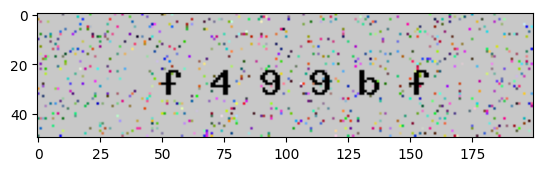

In [36]:
%matplotlib inline
captcha = defeatCaptcha()
print(captcha)
img = cv2.imread("number.php.png")
plt.imshow(img, cmap='gray')

In [23]:
rvcode = driver.find_element("name", "rvcode")
rvcode.clear()
rvcode.send_keys(captcha)
driver.get_screenshot_as_file('12captcha.png')

True

In [24]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

mysubmit = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "submit")))
mysubmit.submit()
time.sleep(3)
driver.get_screenshot_as_file('13done.png')

True

In [25]:
print(loginid)
print("20160101")

Y849046202
20160101


In [26]:
loginurl = "http://siliconexam.com/st-login.php"
driver.get(loginurl)
login_id = driver.find_element("name", "id")
login_id.clear()
login_id.send_keys(loginid)

passwd = driver.find_element("name", "passwd")
passwd.clear()
passwd.send_keys("20160101")

time.sleep(2)
driver.get_screenshot_as_file('14login.png')
driver.find_element('xpath', '//input[@id="lsubmit"]').click()
time.sleep(2)
driver.get_screenshot_as_file('15logindone.png')

True

In [27]:
# WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, '//a[@href="st-photo.php"]'))).click()
driver.find_element('xpath', '//a[@href="st-photo.php"]').click()
time.sleep(2)
driver.get_screenshot_as_file('16photo.png')

True

In [28]:
myphoto = '/content/pics/'+'images_'+str(random.randint(570,684)).zfill(3)+'.jpg'
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "photo"))).send_keys(myphoto)
time.sleep(1)
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@href="javascript:$.colorbox.close();"]'))).click()
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "submit"))).click()
time.sleep(1)
driver.get_screenshot_as_file('17doneupload.png')   

True

In [29]:
driver.close()